In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.feature_extraction import stop_words
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def get_corpus(parent_folder):
    """retourne corpus des textes contenus dans parent_folder sous forme de liste de string"""
    corpus = []
    # iterate over all the files in directory 'parent_folder'
    for file_name in os.listdir(parent_folder):
        if file_name.endswith(".txt"):
            path = parent_folder+"/"+file_name
            fichier = open(path, "r")
            lignes = fichier.readlines()
            fichier.close()
            
            texte = ""
            for ligne in lignes :
                if ligne[0] not in "0123456789":
                    texte += ligne
            corpus.append(texte)
        
        else:
            current_path = "".join((parent_folder, "/", file_name))
            if os.path.isdir(current_path):
                # if we're checking a sub-directory, recall this method
                scan_folder(current_path)
    
    return corpus

In [3]:
def somme_lignes(tab):
    """somme les lignes d'un tableau"""
    res = []
    for i in range(len(tab[0])):
        res.append(0)
    for k in range(len(tab)):
        for i in range(len(tab[0])):
                res[i] += tab[k][i]
    return np.array(res)

In [4]:
def df_n_plus_presents(n, corpus, stopwords_set):
    """dataFrame des n mots les plus present dans le corpus"""
    vectorizer = CountVectorizer(stop_words = stopwords_set)
    X = vectorizer.fit_transform(corpus)
    dico = vectorizer.get_feature_names()
    nb_occ = somme_lignes(X.toarray())
    
    ind = np.argpartition(nb_occ, -n)[-n:]
    ind = ind[np.argsort(-nb_occ[ind])]
    words = [dico[i] for i in ind]

    words_count = []
    i = 0
    for i in range(len(words)):
        words_count.append(nb_occ[ind[i]])

    df = pd.DataFrame(np.column_stack([words, words_count]), columns=['Word', 'Nb_occ'])
    df.Nb_occ=pd.to_numeric(df.Nb_occ)
    
    return df   

In [6]:
def get_hist(df, x_axis, y_axis, titre, colour, font_size=None, horizontal=False):
    if horizontal:
        hist = df.plot.barh(x=x_axis, y=y_axis, color=colour, title =titre, fontsize = font_size, edgecolor = "none").get_figure()
    else:
        hist = df.plot.bar(x=x_axis, y=y_axis, color=colour, title =titre, fontsize = font_size, edgecolor = "none").get_figure()
    path_fig = "img/"+titre+'.png'
    hist.savefig(path_fig,  bbox_inches="tight")

In [7]:
#definition de l'ensemble de stopwords
nltk_sw = set(stopwords.words('english'))
sklearn_sw = set(stop_words.ENGLISH_STOP_WORDS)
stopwords_set = nltk_sw | sklearn_sw
l_nb = [str(i) for i in range(1000000)]
l_mots = ["don", "yeah", "hey", "okay", "oh", "uh", "yes", "ok"]
for mot in l_mots :
    stopwords_set.add(mot)
for nb in l_nb:
    stopwords_set.add(nb)

,Word,Nb_occ
0,know,566
1,right,325
2,gonna,292
3,think,269
4,come,266
5,got,248
6,like,229
7,want,226
8,jack,219
9,need,214


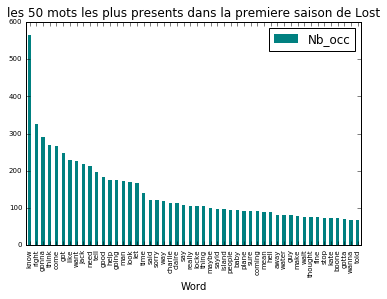

In [10]:
n = 50
corpus = get_corpus("data/1___Lost/01")
df_count = df_n_plus_presents(n, corpus, stopwords_set)
titre = "les "+str(n)+" mots les plus presents dans la premiere saison de Lost"
get_hist(df_count, "Word", "Nb_occ", titre, "teal", 7)
df_count

In [11]:
vectorizer = TfidfVectorizer(stop_words = stopwords_set)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dico = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_names)
df_tfidf.loc[:,'gonna':].head()

,gonna,good,goodbye,goodbyes,goodness,gored,gosh,got,gotcha,goth,...,yo,yokel,york,young,younger,yum,yup,zahraa,zipper,zombies
0,0.093353,0.146697,0.000000,0.0,0.0,0.000000,0.0,0.013336,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.031601,0.105335,0.000000,0.0,0.0,0.000000,0.0,0.052668,0.0,0.0,...,0.021295,0.0,0.0,0.0,0.000000,0.0,0.074277,0.0,0.0,0.0
2,0.238378,0.057211,0.021673,0.0,0.0,0.000000,0.0,0.181168,0.0,0.0,...,0.019277,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.160927,0.056324,0.036578,0.0,0.0,0.028369,0.0,0.096556,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.124679,0.041560,0.000000,0.0,0.0,0.000000,0.0,0.083119,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.036632,0.0,0.000000,0.0,0.0,0.0


In [12]:
nlargest = 20
order = np.argsort(-df_tfidf.values, axis=1)[:, :nlargest]
result = pd.DataFrame(df_tfidf.columns[order], 
                      columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                      index=df_tfidf.index)
result.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20
0,help,transceiver,come,know,pen,shaft,good,drive,right,like,charlie,rescue,cockpit,need,heard,jack,beth,think,gonna,somebody
1,bear,know,come,battery,radio,sir,french,seatbelts,polar,think,gun,fasten,iteration,good,right,going,bodies,bars,checkers,signal
2,gonna,wash,know,got,away,annie,gun,cryin,lord,tell,kate,dog,dangerous,dinosaur,mortgage,signal,say,fever,water,damn
3,helen,know,locke,gonna,rose,john,randy,norman,tell,boar,fish,destiny,right,colonel,fishing,got,come,food,boars,walkabout
4,water,jack,think,come,father,need,know,gonna,waiting,claire,car,going,swim,gone,right,fail,latitude,crazy,man,got


c:\users\amina\appdata\local\programs\python\python35\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


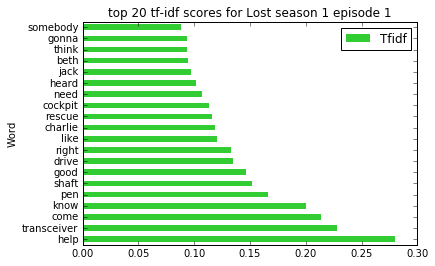

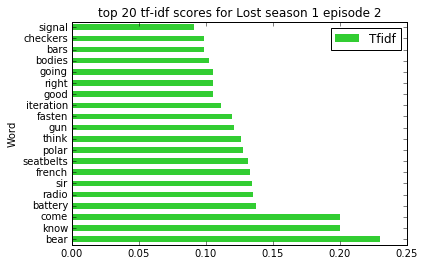

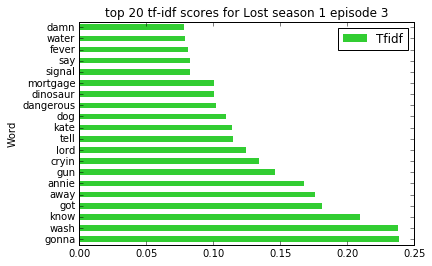

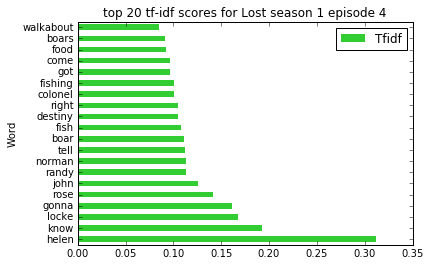

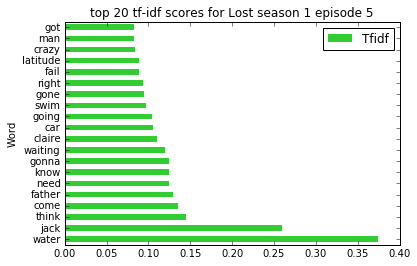

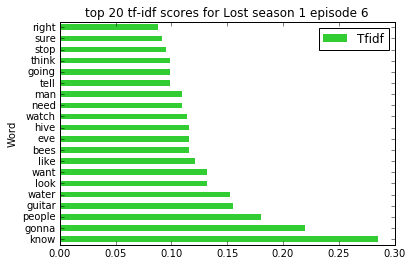

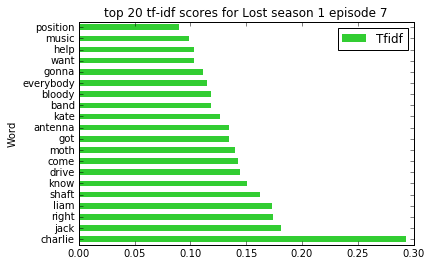

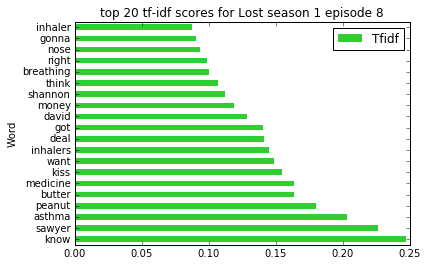

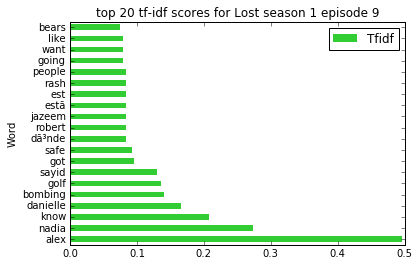

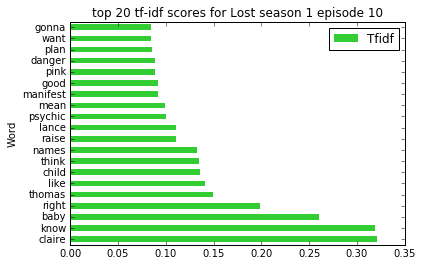

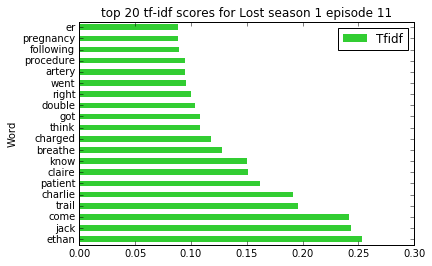

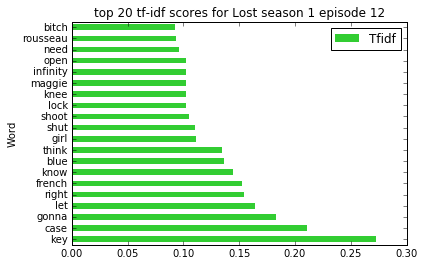

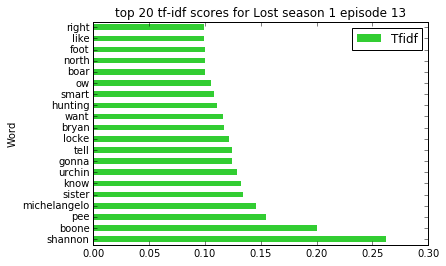

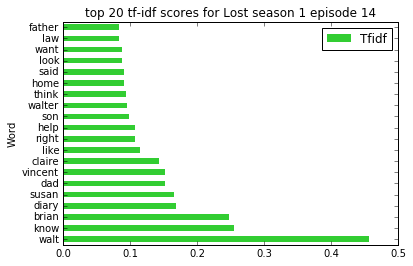

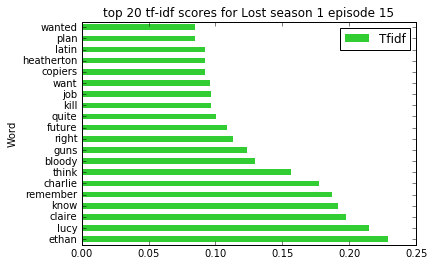

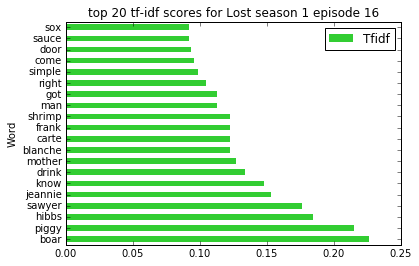

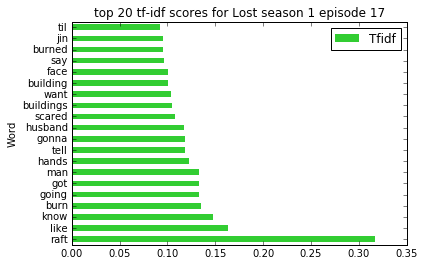

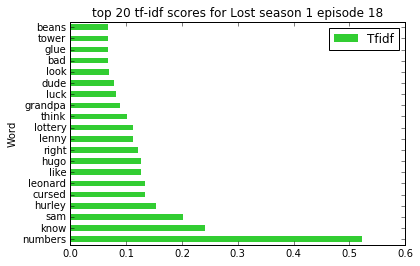

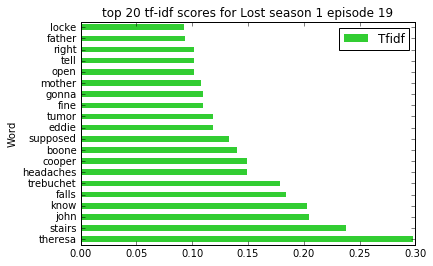

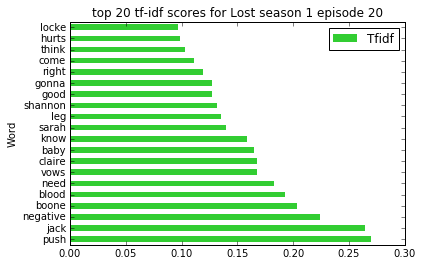

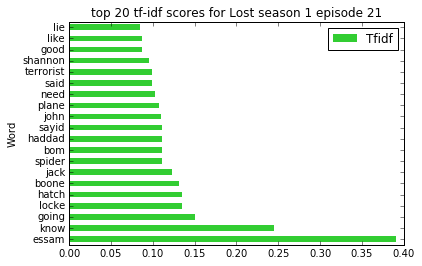

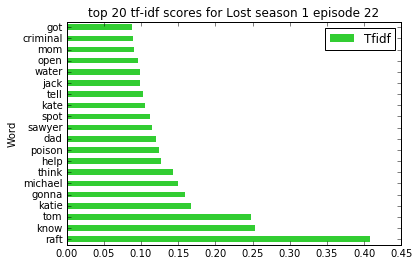

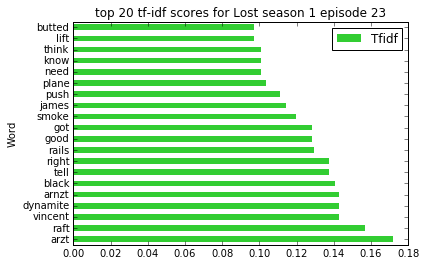

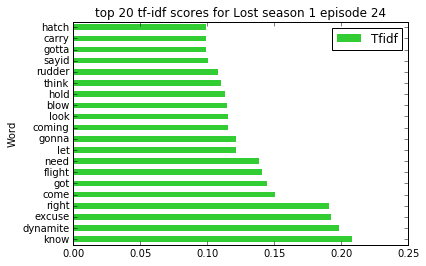

In [14]:
nbep = 24
for i in range(nbep):
    lig_df = df_tfidf[i:i+1]
    lig_res = result[i:i+1]

    mots = list(np.array(lig_res)[0])
    values = [float(lig_df[mot]) for mot in mots]
    df = pd.DataFrame(np.column_stack([mots, values]), columns=['Word', 'Tfidf'])
    df.Tfidf = pd.to_numeric(df.Tfidf)
    df.sort_values(by ='Tfidf', inplace = True, ascending=False)
    titre = "top "+str(nlargest)+" tf-idf scores for Lost season 1 episode "+str(i+1)
    get_hist(df, "Word", "Tfidf", titre, "limegreen", horizontal=True)